### **합성곱 연산**
합성곱 연산은 주어진 데이터 x에 필터 w를 뒤집어서 곱하고 그 곱의 합을 구하는 연산 방법이다. 필터를 곱하는 과정은 필터를 데이터에 시작 부분부터 마지막 부분까지 차례대로 이동하면서 곱하고 합한다.
### **교차 상관 연산**
합성곱 연산과 같은 과정을 거친다. 단, 필터 w를 뒤집지 않고 적용한다. 이번 챕터에서는 교차 상관 연산을 사용하여 합성곱 신경망을 구현한다.
### **패딩**
데이터 시작 또는 끝부분에 '0'을 채워 넣는 것이다. 
- 밸리드 패딩: 데이터에 시작과 끝부분에 '0'으로 채워 넣는 패딩과정이 생략된 것이다. 데이터를 밸리드 패딩으로 연산했을 때 각 데이터 위치의 따라 연산 횟수가 달라진다. 필터 w의 크기가 n이라고 할 때, 맨 첫번째와 맨 마지막 데이터는 각 한번씩 연산이 되고 n번째 이후 데이터는 각 n번씩 연산이 된다. 밸리드 패딩으로 합성곱 연산을 하면 그 결과의 개수는 데이터 수보다 작다.
- 풀 패딩: 모든 데이터의 연산 횟수가 n번이 되도록(똑같도록) 데이터 앞 뒤로 '0'을 넣는다. 풀 패딩으로 합성곱 연산을 하면 그 결과의 개수는 데이터 수보다 크다.
- 세임 패딩: 데이터의 개수와 연산된 결과의 개수가 같도록 데이터의 앞이나 뒤에 '0'을 넣는다.

### **스트라이드**
스트라이드는 필터가 움직이는 간격이다. 보통 스트라이드를 1로 한다. 간혹 2로하는 경우도 있다.(ex.풀링)
### **2차원 배열의 합성곱**
2차원 배열의 데이터 x와 2차원 배열의 필터 w를 합성곱 연산을 한 결과도 2차원 배열의 형태를 띈다.

### **이미지 데이터와 커널**
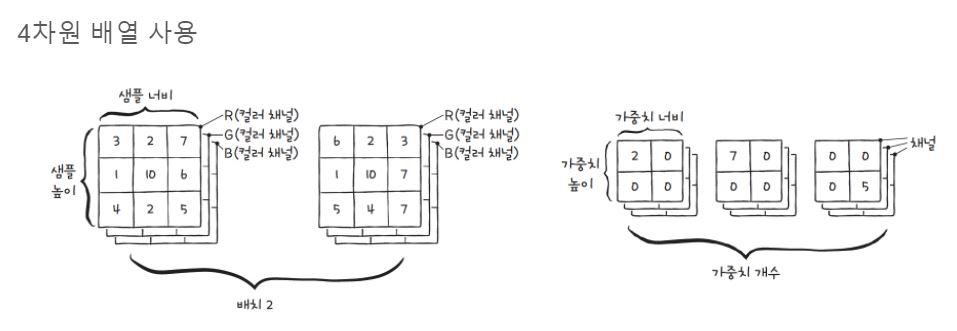

영상은 그레이 채널일 때 너비와 높이를 가진 2차원 배열로 표현이 된다. 주어진 영상이 RGB 컬러맵을 가진 영상일 때 너비와 높이를 가진 R, G, B 3개의 컬러 채널을 가지기 때문에 3차원 배열로 표현된다. 예시의 데이터는 3차원 배열의 개수가 2개이기 때문에 배치가 2가 된다. 따라서 주어진 데이터를 벡터로 표현하면 (2, 3, 3, 3)으로 표현되기 때문에 4차원 배열을 사용한다. 커널은 주어진 데이터와 합성곱 연산을 할 수 있어야 하기 때문에 데이터와 같은 4차원 배열로 표시된다. 커널의 깊이와 주어진 데이터의 깊이는 같아야 한다. 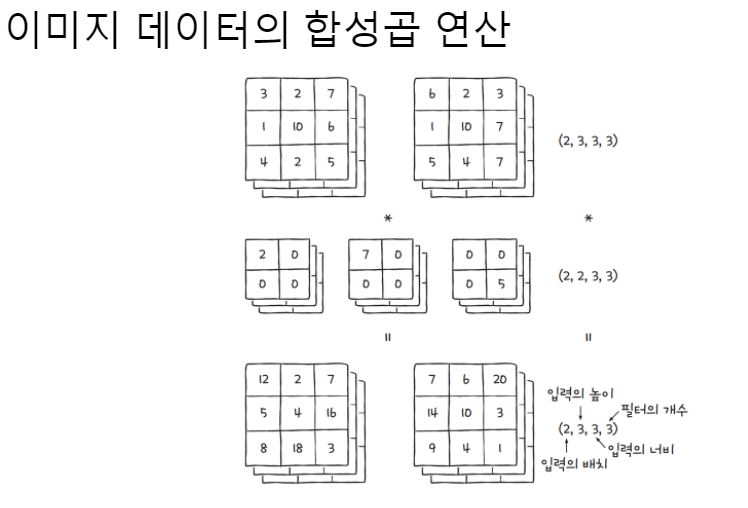

데이터와 필터의 합성곱 연산의 결과는 
(배치 개수, 입력의 높이, 입력의 너비, 필터의 개수)로 표현된다.
### **풀링**
풀링은 최대 풀링과 평균 풀링이 있다. 풀링은 보통 2 x 2씩 스트라이드를 2로 하여 이동한다. 풀링의 사이즈 안에서 최대값을 뽑으면 최대 풀링, 사이즈 안에서 평균 값을 뽑으면 평균 풀링이다. 풀링을 하면 데이터의 사이즈가 축소된다. 평균 풀링을 사용하면 데이터의 특징이 희석이 되기 때문에 최대 풀리을 주로 사용한다.
### **합성곱 신경망**
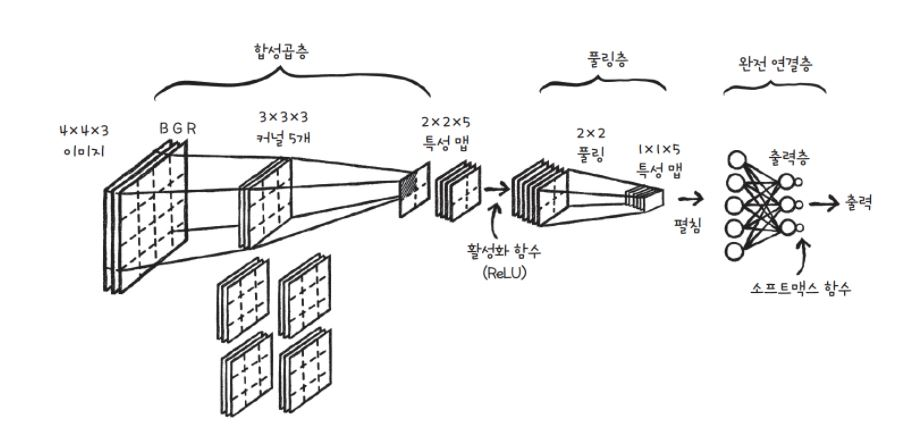
합성곱층은 이미지를 커널로 합성곱 연산을 하는 층이고, 풀링층은 합성곱 연산이 된 데이터를 풀링을 통해 축소하는 층이다. 합성곱층과 풀링층을 거친 이미지 데이터 결과값을 펼쳐서 완전 연결층의 뉴런에 적용한다. 완전연결층에서 활성화 함수와 출력층의 소프트 맥스 함수를 거쳐서 최종 결과 값이 된다.(여기서 출력층 뉴런의 개수는 클래스의 개수이다.) 합성곱층에서 풀링층으로 넘어 갈 때와 완전연결층 안에서 풀링 데이터를 펼친 값이 출력층으로 넘어 갈 때 relu활성화 함수를 사용한다. relu활성화 함수는 음수는 0으로 양수는 자기 자신의 값으로 리턴한다.

In [3]:
#합성곱
import numpy as np
w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w_r = np.flip(w)  # 필터 뒤집기
print(w_r)
w[0:4:2]
for i in range(6):
  print(np.dot(x[i:i+4], w_r))

[3 5 1 2]
63
48
49
28
21
20


In [8]:
from scipy.signal import convolve # 합성곱
convolve(x, w, mode = 'valid')

array([63, 48, 49, 28, 21, 20])

In [9]:
from scipy.signal import correlate # 교차 상관
correlate(x, w, mode='valid')      # valid padding

array([48, 57, 24, 25, 16, 39])

In [10]:
correlate(x, w, mode='full')       # full padding

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [11]:
correlate(x, w, mode='same')       # same padding

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [12]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])

In [14]:
from scipy.signal import correlate2d   # 2차원 교차 상관
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [15]:
np.flip(w)

array([[0, 0],
       [0, 2]])

In [16]:
from scipy.signal import convolve2d # 2차원 합성곱
convolve2d(x, w, mode='valid')

array([[10, 12],
       [16, 18]])

In [17]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [19]:
import tensorflow as tf
x_4d = x.astype(np.float).reshape(1, 3, 3, 1)
w_4d = w.reshape(2, 2, 1, 1)
c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')
c_out.numpy().reshape(3, 3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

In [20]:
# 풀링
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])
x = x.reshape(1, 4, 4, 1)

In [22]:
p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID')
p_out.numpy().reshape(2, 2)

array([[ 6.,  8.],
       [14., 16.]], dtype=float32)

In [23]:
# 합성곱 신경망의 구조
def relu(x):
  return np.maximum(x, 0)

In [24]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

In [26]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

In [64]:
# 합성공 신경망
import tensorflow as tf

class ConvolutionNetwork:

  def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
    self.n_kernels = n_kernels  # 합성곱의 커널 개수
    self.kernel_size = 3        # 커널 크기
    self.optimizer = None       # 옵티마이저
    self.conv_w = None          # 합성곱 층의 가중치
    self.conv_b = None          # 합성곱 층의 절편
    self.units = units          # 은닉층의 뉴런 개수
    self.batch_size = batch_size  # 배치 크기
    self.w1 = None              # 은닉층의 가중치
    self.b1 = None              # 은닉층의 절편
    self.w2 = None              # 출력층의 가중치
    self.b2 = None              # 출력층의 절편
    self.a1 = None              # 은닉층의 활성화 출력
    self.losses = []            # 훈련 손실
    self.val_losses = []        # 검증 손실
    self.lr = learning_rate     # 학습률

  def forpass(self, x):
    # 3x3 2차원 합성곱 연산
    c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
    r_out = tf.nn.relu(c_out) # 합성곱 연산 결과에 렐루 활성화 함수를 적용
    # 2x2 최대풀링
    p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
    f_out = tf.reshape(p_out, [x.shape[0], -1]) # 출력을 1차원으로 펼치기
    z1 = tf.matmul(f_out, self.w1) + self.b1    # 첫 번째 층 선형 식 계산(행렬곱)
    a1 = tf.nn.relu(z1)  # 렐루 활성화 함수 적용
    z2 = tf.matmul(a1, self.w2) + self.b2       # 두 번째 층 선형 식 계산(행렬곱)
    return z2

  def init_weights(self, input_shape, n_classes):
    g = tf.initializers.glorot_uniform()  # 글로벌 최적값을 찾기 위해 랜덤하게 섞기
    self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels))) # 3x3x1, 커널이 n_kernels개
    self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
    n_features = 14 * 14 * self.n_kernels   # 풀링 후 특성의 개수
    self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
    self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
    self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
    self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.init_weights(x.shape, y.shape[1])  # 은닉층, 출력층의 가중치를 초기화
    self.optimizer = tf.optimizers.SGD(learning_rate=self.lr) # 가중치 갱신하는 알고리즘
    for i in range(epochs):    
      print('에포크', i, end=' ')
      batch_losses = []     # 제너레이터 함수에서 반환한 미니배치를 순환
      for x_batch, y_batch in self.gen_batch(x, y):
        print('.',end='')
        self.training(x_batch,y_batch)
        batch_losses.append(self.get_loss(x_batch, y_batch))  # 배치 손실을 기록
      print()
      self.losses.append(np.mean(batch_losses)) # 배치 손실 평균내어 훈련 손실 값으로 저장
      self.val_losses.append(self.get_loss(x_val, y_val)) # 검증 세트에 대한 손실 계산


  def gen_batch(self, x, y):  # 미니배치 제너레이터 함수
    bins = len(x) // self.batch_size  # 미니배치 횟수
    indexes = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end] # batch_size만큼 슬라이싱 하여 반환

  def training(self, x, y):
    m = len(x) # 샘플 개수
    with tf.GradientTape() as tape:
      z = self.forpass(x)
      loss = tf.nn.softmax_cross_entropy_with_logits(y, z) # 손실 계산
      loss = tf.reduce_mean(loss)
    weights_list = [self.conv_w, self.conv_b, self.w1, self.b1, self.w2, self.b2]
    grads = tape.gradient(loss, weights_list) # 가중치에 대한 그래디언트 계산
    self.optimizer.apply_gradients(zip(grads, weights_list)) # 가중치 업데이트

  def predict(self, x):
    z = self.forpass(x)
    return np.argmax(z.numpy(), axis = 1) # 가장 큰 값의 인덱스를 반환

  def score(self, x, y):
    # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
    return np.mean(self.predict(x) == np.argmax(y, axis=1))

  def get_loss(self, x, y):
    z = self.forpass(x)                 # 정방향 계산을 수행합니다.
    # 손실을 계산하여 저장합니다.
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
    return loss.numpy()  #####

In [65]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
  y = x ** 3 + 2 * x + 5

print(tape.gradient(y, x)) # 그래디언트 계산

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [66]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = tf.nn.softmax(x)

# 그래디언트를 계산합니다.
print(tape.gradient(y, x))

tf.Tensor([1.99908031e-17 5.43406367e-17 1.47713165e-16], shape=(3,), dtype=float64)


In [67]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [69]:
#원핫 인코딩
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [70]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_train.shape

(48000, 28, 28, 1)

In [71]:
x_train = x_train / 255    #####
x_val = x_val / 255

In [75]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, x_val=x_val, y_val=y_val_encoded, epochs=10)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

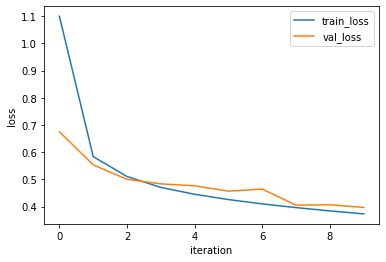

In [76]:
import matplotlib.pyplot as plt
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [78]:
cn.score(x_val, y_val_encoded)

0.8619166666666667